In [68]:
# **Step 1: Stock Price Analysis and Prediction**

In [69]:
# **Step 1.1: Importing Required Libraries for numerical analysis and prediction of stock prices**


In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
import yfinance as yf

In [90]:
quote='MRF.NS'

In [104]:
def get_historical(quote):
    end = datetime(2024,3,1)
    start = datetime(2005,1,2)
    data = yf.download(quote, start=start, end=end)
    df = pd.DataFrame(data=data)
    df.to_csv(''+quote+'.csv')
    if(df.empty):
        ts = TimeSeries(key='N6A6QT6IBFJOPJ70',output_format='pandas')
        data, meta_data = ts.get_daily_adjusted(symbol='NSE:'+quote, outputsize='full')
        #Format df
        #Last 2 yrs rows => 502, in ascending order => ::-1
        data=data.head(503).iloc[::-1]
        data=data.reset_index()
        #Keep Required cols only
        df=pd.DataFrame()
        df['Date']=data['date']
        df['Open']=data['1. open']
        df['High']=data['2. high']
        df['Low']=data['3. low']
        df['Close']=data['4. close']
        df['Adj Close']=data['5. adjusted close']
        df['Volume']=data['6. volume']
        df.to_csv(''+quote+'.csv',index=False)
    return

In [107]:
get_historical(quote)

In [108]:
%pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [109]:
import datetime

In [110]:
end = datetime.datetime(2024,3,1)
start = datetime.datetime(2005,1,2)

In [111]:
def get_historical(quote):
    ticker = yf.Ticker(quote)
    end = datetime.datetime(2024,3,1)
    start = datetime.datetime(2005,1,2)
    data = ticker.history(start=start, end=end)
    df = pd.DataFrame(data=data)

In [112]:
# **Step 1.3 : Creating a dataframe for storing the Closing stock data per day**

In [113]:
# convert an array of values into a dataset matrix
def create_dataset(df2, look_back=1):
	dataX, dataY = [], []
	for i in range(len(df2)-look_back-1):
		a = df2[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(df2[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [114]:
df2 = pd.read_csv('MRF.NS.csv', usecols=[5], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

In [115]:
# **Step 1.4: Data Normalization and Division into Training and Test sets**

In [116]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df2)

# split into train and test sets
train_size = int(len(df2) * 0.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

In [117]:
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [118]:
# **Step 1.5 : Creating a LSTM Neural Network Model for Numerical Analysis**

In [119]:
# create and fit the LSTM networkworkbench.action.openLargeOutput
model = Sequential()
model.add(LSTM(7, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=5, verbose=2)

Epoch 1/100
633/633 - 1s - loss: 0.0049 - 652ms/epoch - 1ms/step
Epoch 2/100
633/633 - 0s - loss: 1.6654e-05 - 225ms/epoch - 356us/step
Epoch 3/100
633/633 - 0s - loss: 1.5108e-05 - 232ms/epoch - 366us/step
Epoch 4/100
633/633 - 0s - loss: 1.4078e-05 - 227ms/epoch - 358us/step
Epoch 5/100
633/633 - 0s - loss: 1.4191e-05 - 229ms/epoch - 361us/step
Epoch 6/100
633/633 - 0s - loss: 1.4335e-05 - 230ms/epoch - 363us/step
Epoch 7/100
633/633 - 0s - loss: 1.4931e-05 - 241ms/epoch - 380us/step
Epoch 8/100
633/633 - 0s - loss: 1.4382e-05 - 228ms/epoch - 361us/step
Epoch 9/100
633/633 - 0s - loss: 1.4959e-05 - 226ms/epoch - 356us/step
Epoch 10/100
633/633 - 0s - loss: 1.5181e-05 - 225ms/epoch - 355us/step
Epoch 11/100
633/633 - 0s - loss: 1.6056e-05 - 227ms/epoch - 358us/step
Epoch 12/100
633/633 - 0s - loss: 1.5343e-05 - 225ms/epoch - 356us/step
Epoch 13/100
633/633 - 0s - loss: 1.4693e-05 - 226ms/epoch - 356us/step
Epoch 14/100
633/633 - 0s - loss: 1.5555e-05 - 225ms/epoch - 355us/step
Epoch 1

In [120]:
# **Step 1.6 : Making Predictions of the Model**

In [121]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

49/49 [==============================] - 0s 293us/step


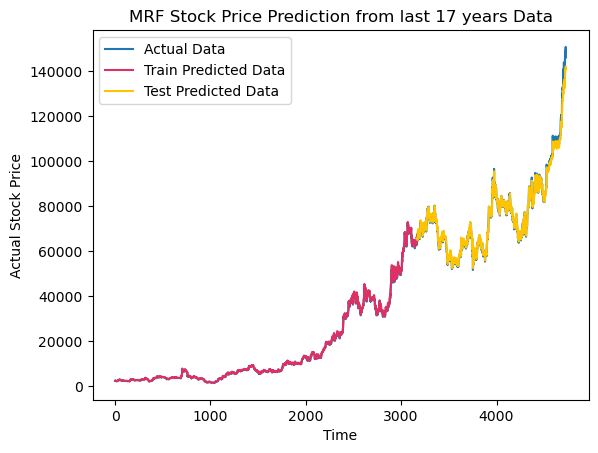

In [122]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2), label = 'Actual Data')
plt.title('MRF Stock Price Prediction from last 17 years Data')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.plot(trainPredictPlot,color='#DE3163', label = 'Train Predicted Data')
plt.plot(testPredictPlot, color='#FFC300', label = 'Test Predicted Data')
plt.legend(loc='best')
plt.show()

In [123]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Root mean square error of Training  = ",trainScore," RMSE")
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Root mean square error of Testing = ",testScore," RMSE")


Root mean square error of Training  =  467.8163477618451  RMSE
Root mean square error of Testing =  1754.674892482021  RMSE


In [ ]:
# **Step 2: Textual Data(News Headlines) Analysis**

In [ ]:
# **Step 2.1:  Importing Required Libraries for Textual (News Headlines) analysis**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime

In [ ]:
# **Step 2.2 : Importing the Textual dataset and performing Exploratory Analysis**

In [27]:
data = pd.read_csv('india-news-headlines.csv')
data.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [28]:
data['publish_date'].duplicated()

0          False
1           True
2           True
3           True
4           True
           ...  
3650965     True
3650966     True
3650967     True
3650968     True
3650969     True
Name: publish_date, Length: 3650970, dtype: bool

In [29]:
data = data.drop_duplicates('publish_date', keep='first').sort_index()
data= data.reset_index()

In [30]:
data.rename(columns={'publish_date': 'Date'},inplace = True)
data.head()

,index,Date,headline_category,headline_text
0,0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,86,20010103,unknown,Powerless north India gropes in the dark
2,127,20010104,unknown,The string that pulled Stephen Hawking to India
3,280,20010105,unknown,Light combat craft takes India into club class
4,406,20010106,unknown,Light combat craft takes India into club class


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7717 entries, 0 to 7716
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              7717 non-null   int64 
 1   Date               7717 non-null   int64 
 2   headline_category  7717 non-null   object
 3   headline_text      7717 non-null   object
dtypes: int64(2), object(2)
memory usage: 241.3+ KB


In [32]:
data['headline_category'].value_counts()

headline_category
unknown                                  987
entertainment.hindi.bollywood            732
india                                    343
life-style.relationships.man-woman       332
edit-page                                256
                                        ... 
shobhaa-de.politically-incorrect           1
city.jammu                                 1
friendship-day                             1
entertainment.marathi.movies.previews      1
astrology.horoscope.yearly                 1
Name: count, Length: 330, dtype: int64

In [33]:
city_data = data[data['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]
city_data

,index,Date,headline_category,headline_text
8,642,20010110,city.patna,Fend for yourselves; Pande tells doctors
48,2215,20010309,city.delhi,Maneka asks govt to take back land for cow she...
114,4563,20010522,city.pune,She turned and fought
116,4693,20010527,city.bengaluru,Need to boost exports; says bank head
118,4917,20010529,city.bengaluru,US visit won't be piece of cake for Krishna
...,...,...,...,...
7700,3642496,20220315,city.mumbai,Mumbaikars enjoy nightlife once more as restau...
7703,3643993,20220318,city.mumbai,Mumbai salons and spas deal with heavy demand ...
7707,3645983,20220322,city.patna,Sikta MLA pleads for police reform
7710,3647476,20220325,city.delhi,Speeding up; shortcuts and tackling unruly cus...


In [34]:
city_split = pd.DataFrame(columns=['city_name'])

In [35]:
city_split['city_name'] = city_data.headline_category.str.split('.',expand=True)[1]

In [36]:
# concate the data set city_data and city_split
city_data = pd.concat([city_data,city_split],axis=1)

In [37]:
# removing unnecessary column from dataset
city_data.drop(columns=['headline_category'],axis=1, inplace=True)

In [38]:
# re-setting the index
city_data.reset_index(inplace=True)

In [39]:
# see the final data which contain city_name column
city_data.head()

,level_0,index,Date,headline_text,city_name
0,8,642,20010110,Fend for yourselves; Pande tells doctors,patna
1,48,2215,20010309,Maneka asks govt to take back land for cow she...,delhi
2,114,4563,20010522,She turned and fought,pune
3,116,4693,20010527,Need to boost exports; says bank head,bengaluru
4,118,4917,20010529,US visit won't be piece of cake for Krishna,bengaluru


In [41]:
city_data.drop(['level_0', 'index'],axis=1)

,Date,headline_text,city_name
0,20010110,Fend for yourselves; Pande tells doctors,patna
1,20010309,Maneka asks govt to take back land for cow she...,delhi
2,20010522,She turned and fought,pune
3,20010527,Need to boost exports; says bank head,bengaluru
4,20010529,US visit won't be piece of cake for Krishna,bengaluru
...,...,...,...
1412,20220315,Mumbaikars enjoy nightlife once more as restau...,mumbai
1413,20220318,Mumbai salons and spas deal with heavy demand ...,mumbai
1414,20220322,Sikta MLA pleads for police reform,patna
1415,20220325,Speeding up; shortcuts and tackling unruly cus...,delhi


In [40]:
# there are so many cities which we can see
city_data.city_name.unique()

array(['patna', 'delhi', 'pune', 'bengaluru', 'ahmedabad', 'mumbai',
       'thiruvananthapuram', 'kolkata', 'hyderabad', 'lucknow',
       'chandigarh', 'goa', 'nagpur', 'guwahati', 'rajkot', 'bhubaneswar',
       'surat', 'allahabad', 'varanasi', 'vadodara', 'mangaluru',
       'ranchi', 'jaipur', 'ludhiana', 'mysuru', 'kanpur', 'thane',
       'hubballi', 'kochi', 'navimumbai', 'gurgaon', 'indore', 'kolhapur',
       'agartala', 'madurai', 'bareilly', 'aurangabad', 'meerut',
       'visakhapatnam', 'trichy', 'coimbatore', 'jammu', 'dehradun',
       'nashik', 'noida', 'puducherry', 'erode', 'chennai', 'jind',
       'ghaziabad', 'bhopal', 'jamshedpur', 'vijayawada', 'agra',
       'shimla', 'amritsar'], dtype=object)

In [ ]:
# **Step 2.3: Representing number of headline text (News Headline) per city**

In [42]:
# create a group of cities and let's see which city have, how many no. of headine text
city_headline = city_data.groupby(['city_name']).agg({'headline_text':'count'})

In [43]:
#for better understanding remane the column
city_headline.rename(columns={'headline_text':'Number_of_headline_text'},inplace=True)

In [44]:
# finding the top 15 cities which have high number of headlines text
city_headline = city_headline.sort_values(by='Number_of_headline_text',ascending=False)
top_15_headline_city = city_headline.head(15)
top_15_headline_city

,Number_of_headline_text
city_name,
bengaluru,113
mumbai,94
delhi,84
ahmedabad,83
pune,78
hyderabad,75
patna,73
chandigarh,59
goa,57


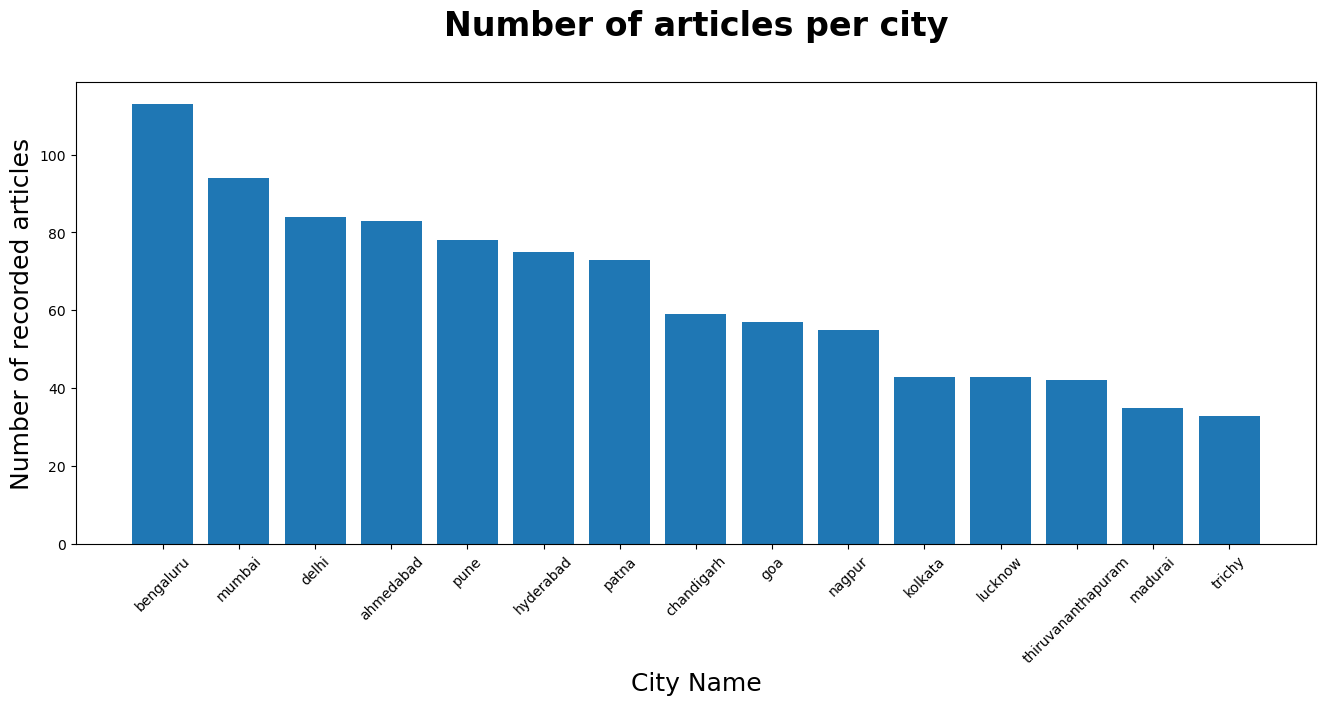

In [45]:
# plotting a graph for better understanding for top 15 cities which have high no. of headline text

plt.figure(figsize=(16,6))
plt.bar(top_15_headline_city.index,height=top_15_headline_city['Number_of_headline_text'])
plt.xticks(rotation = 45)
plt.xlabel('City Name',fontsize=18)
plt.ylabel('Number of recorded articles',fontsize=18)
plt.title('Number of articles per city\n',fontsize=24, fontweight='bold')
plt.show()

In [ ]:
# **Step 2.4: Representing Number of News Headlines per year and per city**

In [46]:
city_data['Date'] = pd.to_datetime(city_data['Date'])
city_data.head()

,level_0,index,Date,headline_text,city_name
0,8,642,1970-01-01 00:00:00.020010110,Fend for yourselves; Pande tells doctors,patna
1,48,2215,1970-01-01 00:00:00.020010309,Maneka asks govt to take back land for cow she...,delhi
2,114,4563,1970-01-01 00:00:00.020010522,She turned and fought,pune
3,116,4693,1970-01-01 00:00:00.020010527,Need to boost exports; says bank head,bengaluru
4,118,4917,1970-01-01 00:00:00.020010529,US visit won't be piece of cake for Krishna,bengaluru


In [47]:
city_data['Year'] = city_data['Date'].apply(lambda x: (x.year))

In [48]:
# dropping unnecessary columns
city_data.drop(columns=['Date','index'],axis=1,inplace=True)

In [49]:
# final result
city_data.head()

,level_0,headline_text,city_name,Year
0,8,Fend for yourselves; Pande tells doctors,patna,1970
1,48,Maneka asks govt to take back land for cow she...,delhi,1970
2,114,She turned and fought,pune,1970
3,116,Need to boost exports; says bank head,bengaluru,1970
4,118,US visit won't be piece of cake for Krishna,bengaluru,1970


In [50]:
city_data_2 = city_data.copy()
city_data_2['Number_of_headline_text'] = 1

In [51]:
# dropping unwanted column
city_data_2.drop(columns=['headline_text'],axis=1, inplace=True)

In [52]:
city_data_2.head()

,level_0,city_name,Year,Number_of_headline_text
0,8,patna,1970,1
1,48,delhi,1970,1
2,114,pune,1970,1
3,116,bengaluru,1970,1
4,118,bengaluru,1970,1


In [53]:
top_15_headline_city.head(7)

,Number_of_headline_text
city_name,
bengaluru,113
mumbai,94
delhi,84
ahmedabad,83
pune,78
hyderabad,75
patna,73


In [54]:
# creating new data_set for top 7 cities with year 

city_beng = city_data_2[city_data_2.city_name == 'bengaluru']
city_del = city_data_2[city_data_2.city_name == 'delhi']
city_ahme = city_data_2[city_data_2.city_name == 'ahmedabad']
city_mum = city_data_2[city_data_2.city_name == 'mumbai']
city_pune = city_data_2[city_data_2.city_name == 'pune']
city_hyd = city_data_2[city_data_2.city_name == 'hyderabad']
city_luck = city_data_2[city_data_2.city_name == 'luck']

In [55]:
famous_cities = [city_beng, city_del, city_ahme, city_mum, city_pune, city_hyd, city_luck]
data_famous_cities = pd.concat(famous_cities)

In [56]:
# reset index numbers
data_famous_cities.reset_index(inplace=True)

In [57]:
# top 7 cities
print(data_famous_cities.shape)
data_famous_cities.head()

(527, 5)


,index,level_0,city_name,Year,Number_of_headline_text
0,3,116,bengaluru,1970,1
1,4,118,bengaluru,1970,1
2,5,119,bengaluru,1970,1
3,7,135,bengaluru,1970,1
4,10,138,bengaluru,1970,1


In [58]:
data_famous_cities=data_famous_cities.drop(['level_0'],axis=1)
data_famous_cities.head()

,index,city_name,Year,Number_of_headline_text
0,3,bengaluru,1970,1
1,4,bengaluru,1970,1
2,5,bengaluru,1970,1
3,7,bengaluru,1970,1
4,10,bengaluru,1970,1


In [59]:
# year-wise no. of headlines text
city_year_count = pd.Series(city_data_2.groupby(['Year'])['Number_of_headline_text'].count())

# year-wise data which shows which city have how many no. of headline text
city_count = data_famous_cities.groupby(['Year', 'city_name']).sum()['Number_of_headline_text'].unstack()

In [60]:
city_count.head()

city_name,ahmedabad,bengaluru,delhi,hyderabad,mumbai,pune
Year,,,,,,
1970,83,113,84,75,94,78


In [61]:
city_year_count.head()

Year
1970    1417
Name: Number_of_headline_text, dtype: int64

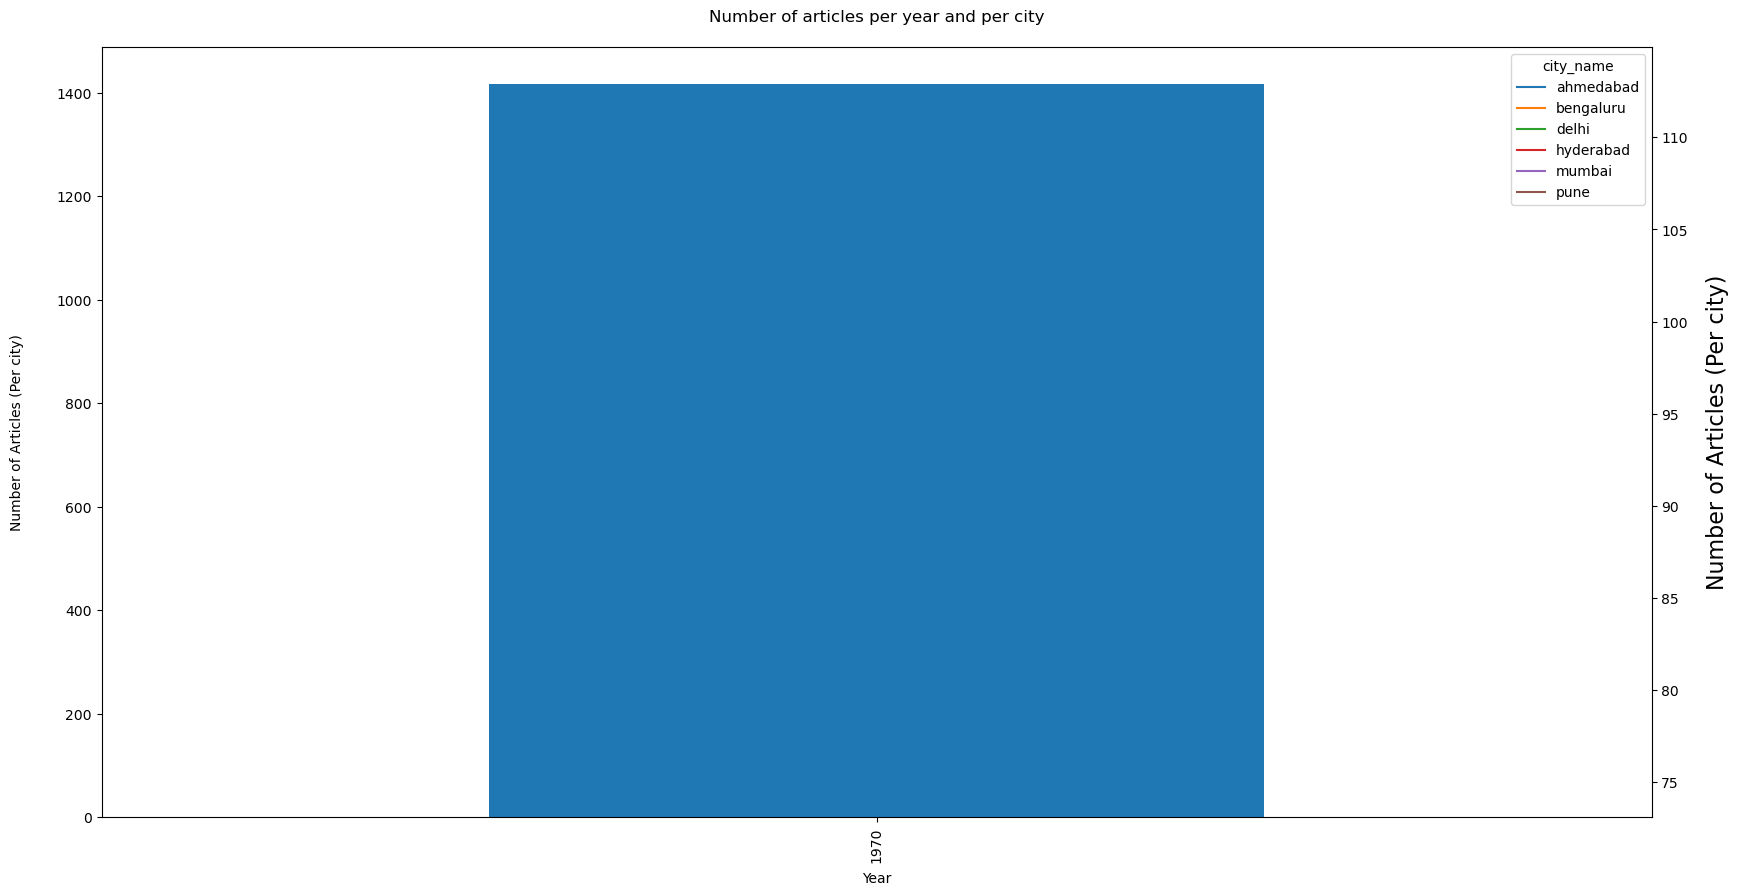

<Figure size 2000x1000 with 0 Axes>

In [62]:
fig=plt.figure()

a = fig.add_subplot(111,label="1")
b = fig.add_subplot(111,label="2", frame_on = False)

plt.figure(figsize=(20,10))
city_year_count.plot(kind='bar',figsize=(20,10), ax=a,title="Number of articles per year and per city\n")
a.set_ylabel('Number of Articles (Per city)')
a.set_xlabel("")

city_count.plot(ax=b)
b.set_xticks([])
b.set_ylabel('Number of Articles (Per city)', size =16)
b.yaxis.tick_right()
b.set_xlabel('Year') 

a.get_yaxis().set_label_coords(-.05,0.5)
b.get_yaxis().set_label_coords(1.05,0.5)
b.get_xaxis().set_label_coords(0.5, -0.07)

plt.show()

In [ ]:
# **Step 2.5: Sentiment Analysis of News Headlines**

In [63]:
def getAnalysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [64]:
data['Result'] = np.array([getAnalysis_polarity(headline) for headline in data['headline_text']])

In [65]:
final_result = data.groupby(['Result']).agg({'headline_text':'count'})
final_result

,headline_text
Result,
negative,773
neutral,5113
positive,1831


In [66]:
negative = (final_result.loc['negative'] / len(data))*100
neutral = (final_result.loc['neutral'] / len(data))*100
positive = (final_result.loc['positive'] / len(data))*100


print('Positive Headlines: ' , positive )
print('\n\nNegative Headlines: ' ,negative )
print('\n\nUnbiased Headlines: ' , str(neutral))

Positive Headlines:  headline_text    23.726837
Name: positive, dtype: float64


Negative Headlines:  headline_text    10.016846
Name: negative, dtype: float64


Unbiased Headlines:  headline_text    66.256317
Name: neutral, dtype: float64


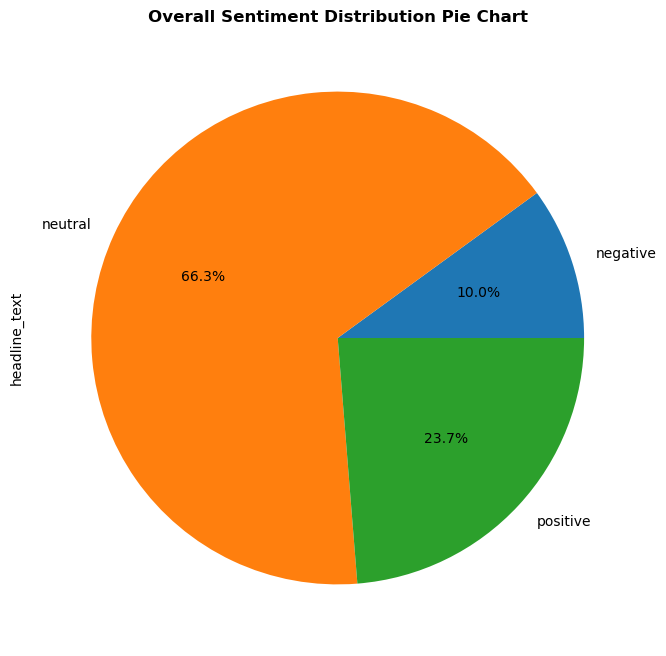

In [67]:
plt.figure(figsize=(8,8))
final_result['headline_text'].plot.pie(autopct='%1.1f%%')
plt.title("Overall Sentiment Distribution Pie Chart",fontweight="bold")
plt.show()